# 1. Niño 3.4 index

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

import netCDF4
import xarray as xr

In [6]:
ds  = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
ds_re = ds.sel(lat=slice(-5,5),lon=slice(190,240))
#ds

## 1.1 Compute monthly climatology for SST from Niño 3.4 region, and subtract climatology from SST time series to obtain anomalies.

In [7]:

group_d = ds_re.sst.groupby('time.month')
monthly_mean = ds_re.sst.groupby('time.month').mean(dim='time')
anom = group_d - monthly_mean


print(anom.data)



[[[-0.43157768 -0.41846275 -0.39795303 ... -0.2116642  -0.23776245
   -0.24401474]
  [-0.41259003 -0.4067192  -0.3875141  ... -0.52064896 -0.5346451
   -0.51997185]
  [-0.40932274 -0.39743805 -0.36237717 ... -0.6373882  -0.6171951
   -0.583725  ]
  [-0.4140854  -0.37909317 -0.3215618  ... -0.43292618 -0.38404274
   -0.3352623 ]
  [-0.5043678  -0.43894005 -0.3710251  ... -0.17453575 -0.11044502
   -0.06918144]]

 [[-0.5374584  -0.52739716 -0.50823593 ... -0.40254593 -0.44382668
   -0.45287704]
  [-0.55093956 -0.539135   -0.51673317 ... -0.6660595  -0.7127285
   -0.710968  ]
  [-0.61242104 -0.5959244  -0.5572338  ... -0.7235069  -0.7326374
   -0.73106194]
  [-0.6798363  -0.6483364  -0.5889931  ... -0.5397434  -0.50793266
   -0.49977684]
  [-0.7830448  -0.7286701  -0.6683655  ... -0.33967972 -0.29167747
   -0.27325058]]

 [[-0.4547863  -0.43338776 -0.40325546 ... -0.19753456 -0.23086166
   -0.23381996]
  [-0.44275093 -0.40014458 -0.34834862 ... -0.50234795 -0.53378105
   -0.5277729 ]
  [-

## 1.2 Visualize the computed Niño 3.4. Your plot should look similar to this one. 

<ipython-input-12-11c7e5c3c0c4>:6: RuntimeWarning: Mean of empty slice
  line_anom =np.nanmean(anom_rol,axis=(1,2))


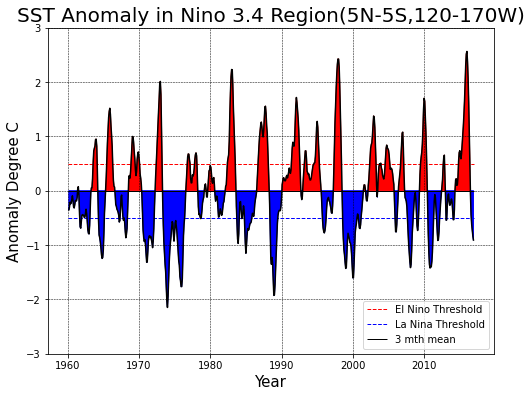

In [12]:

anom_rol = anom.rolling(time=3,center=True).mean()

fig,ax = plt.subplots(1,1,figsize=[8,6])
line_anom =np.nanmean(anom_rol,axis=(1,2))
t = pd.date_range(start='1960-01',periods=684,freq='m') 

ax.plot(t,line_anom,color='k') 

ax.set_ylabel('Anomaly Degree C',color='k',fontsize=15) 
ax.set_xlabel('Year',color='k',fontsize=15) 
ax.set_title('SST Anomaly in Nino 3.4 Region(5N-5S,120-170W)',fontsize=20)

ax.grid(linestyle='--',linewidth=0.5,color='k')

ax.hlines(y=0.5,xmin=t[0],xmax=t[-1],color='r',ls='--',lw=1,label='EI Nino Threshold') 
ax.hlines(y=-0.5,xmin=t[0],xmax=t[-1],color='b',ls='--',lw=1,label='La Nina Threshold') 
ax.hlines(y=0,xmin=t[0],xmax=t[-1],color='k',ls='solid',lw=1,label='3 mth mean')

ax.set_ylim(-3,3) 
ax.legend(loc=4,fontsize=10)

ax.fill_between(t,line_anom,where=(line_anom>0),color='r') 
ax.fill_between(t,line_anom,where=(line_anom<0),color='b')
